## Вопрос 1
Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

1) Прокурор оценил следующие вероятности:
* P(у подсудимого редкая группа крови|подсудимый невиновен) $=0.01$
* P(у невиновного человека не редкая группа крови) $= 0.99$

При этом нужно было оценить следующие вероятности:

Пусть:
* A - подсудимый виновен
* B - у подсудимого редкая группа крови

Тогда по формуле Байеса:
\begin{equation*}
P(A|B) = \dfrac{P(B|A)P(A)}{P(B)} = \dfrac{P(A)}{P(B)}
\end{equation*}

По формуле полной вероятности:
\begin{equation*}
P(B) = P(B|A)P(A) + P(B|\overline{A})P(\overline{A}) = P(A) + 0.01(1-P(A))
\end{equation*}

Тогда апостериорная вероятность того, что подсудимый виновен:

\begin{equation*}
P(A|B) = \dfrac{P(A)}{P(A) + 0.01(1-P(A))}
\end{equation*}

In [27]:
import matplotlib.pyplot as plt
import numpy as np

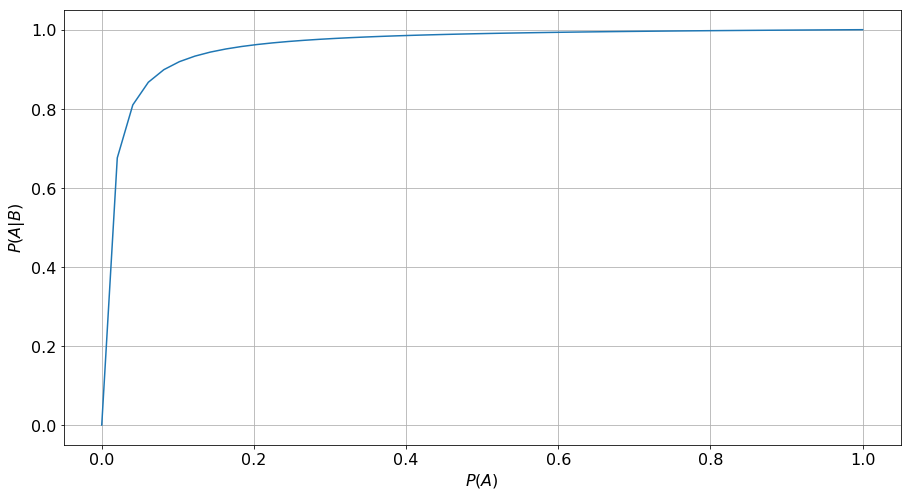

In [28]:
x = np.linspace(0, 1, 50)
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 16})
plt.plot(x, x/(x + 0.01*(1-x)))
plt.xlabel("$P(A)$")
plt.ylabel("$P(A|B)$")
plt.grid()
plt.show()

Апостериорная вероятность вины достаточно высока даже при низкой априорной.

## Вопрос 2
Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить

1) Адвокат оценил следующую вероятность:

P(случайно выбранный человек из людей с редкой группой крови убийца) $=0.0001$

Адвокат не прав в том, что не учитывал априорную вероятность того, что подсудимый убийца. Так как подсудимый уже на скамье подсудимых, то скорее всего его априоорная вероятность быть убийцей выше, чем у случайно выбранного человека из города

## Вопрос 3

Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


Пусть: 
* A - человек болеет короновирусом, $P(A) = 0.01$
* B - положительный результат теста

Выпишем апостериорную вероятность ошибки 1-го и 2-го рода (false positive и false negative)

false positive (FP):
$P(B|\overline{A}) = 1 - P(\overline{B}|\overline{A})$

$P(\overline{B}|\overline{A}) = 1 - P(B|\overline{A}) = 1-P(FP)$

false negative (FN):
$P(\overline{B}|A) = 1 - P(B|A)$, 

$P(B|A) = 1 - P(\overline{B}|A) = 1-P(FN)$

По формуле Байеса:

Апостериорная вероятность болезни после положительного теста:
\begin{equation*}
P(A|B) = \dfrac{P(B|A)P(A)}{P(B|A)P(A) + P(B|\overline{A})P(\overline{A})} = \dfrac{0.01(1-P(FN))}{0.01(1-P(FN)) + 0.99P(FP)}
\end{equation*}
Апостериорная вероятность болезни после отрицательного теста:
\begin{equation*}
P(A|\overline{B}) = \dfrac{P(\overline{B}|A)P(A)}{P(\overline{B}|A)P(A) + P(\overline{B}|\overline{A})P(\overline{A})} = \dfrac{0.01P(FN)}{0.01P(FN) + 0.99(1-P(FP))}
\end{equation*}

$P(A|B)$:

In [29]:
def get_proba_ab(fp,fn):
    return (0.01 * (1-fn)) / (0.01 * (1 - fn) + 0.99 * fp)

$P(A|\overline{B})$:

In [30]:
def get_proba_anb(fp,fn):
    return (0.01 * fn) / (0.01 * fn + 0.99 * (1 - fp))

Построим зависимость апостериорной вероятности болезни от ошибки теста при фиксированной ошибки в одну сторону

In [31]:
probs_test = np.linspace(0, 0.05, 50)
probs_test_fix = np.ones_like(probs_test) * 0.05

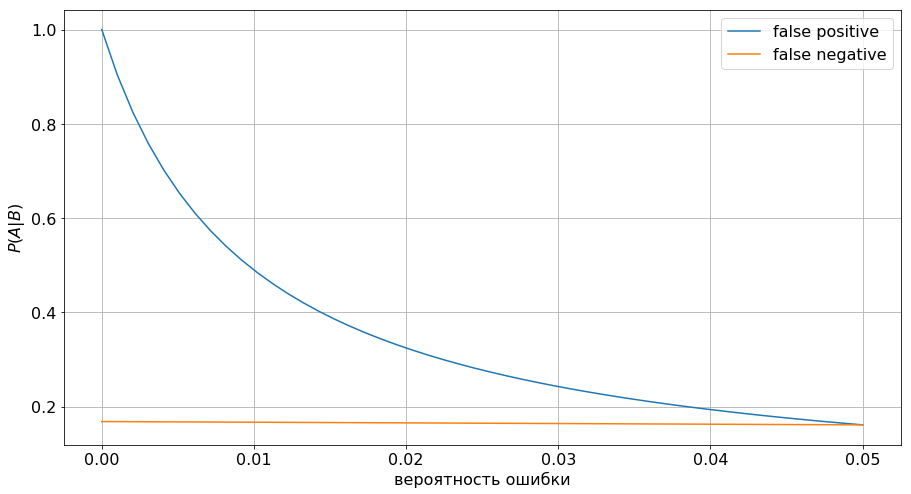

In [32]:
plt.figure(figsize=(15, 8))
plt.plot(probs_test, list(map(get_proba_ab, probs_test,probs_test_fix)),label='false positive')
plt.plot(probs_test, list(map(get_proba_ab, probs_test_fix,probs_test)),label='false negative')
plt.ylabel('$P(A|B)$')
plt.xlabel('вероятность ошибки')
plt.legend()
plt.grid()
plt.show()

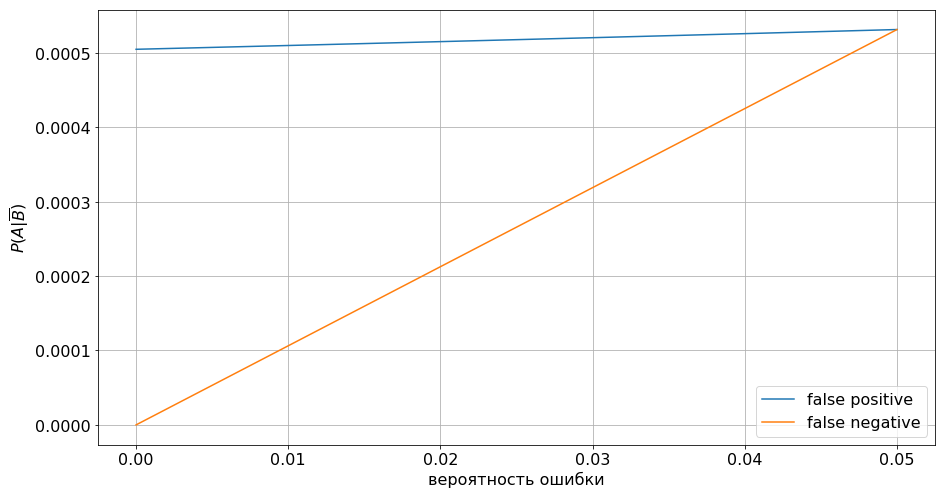

In [34]:
plt.figure(figsize=(15, 8))
plt.plot(probs_test, list(map(get_proba_anb, probs_test,probs_test_fix)),label='false positive')
plt.plot(probs_test, list(map(get_proba_anb, probs_test_fix,probs_test)),label='false negative')
plt.ylabel('$P(A|\overline{B})$')
plt.xlabel('вероятность ошибки')
plt.grid()
plt.legend()
plt.show()

Уменьшение ложноположительных показаний теста сильно увеличивает вероятность оказатся больным после положительного теста, при этом почти не снижает вероятности оказаться больным при отрицательном тесте.

Уменьшение ложноотрицательных показаний почти не меняет вероятности окзатся больным при положительном тесте, при этом вероятность оказаться больным при отрицательном тесте линейно убывает

Наверное важнее сосредоточится на уменьшении ложноотрицательных ошибок, так как в случае отрицательного теста, больной человек будет заражать других, что увеличит число зараженных. При этом ложноположительная ошибка не так страшна.